In [98]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

In [99]:
sns.set('paper', 'white', 'Paired', font_scale=2,
rc={'lines.linewidth': 2,
'text.usetex' : False,
'figure.figsize': (10.0, 6.0),
'image.interpolation': 'nearest',
'image.cmap': 'gray'})
sns.set_style(style='whitegrid')
sns.set_palette('colorblind', color_codes=True)
# define valores padrões do tamanho dos plots
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20

In [100]:
data_path = os.path.join('..',  'output', 'results')

In [101]:
models = ['R_101_FPN_3x', 'R_101_C4_1x', 'R_50_FPN_1x', 'R_50_C4_1x' ]
sets = ['set_1', 'set_2', 'set_3', 'set_4'] 
phases = ['total', 'validation']

Priting losses

In [111]:
aaa = ['train', 'valid']

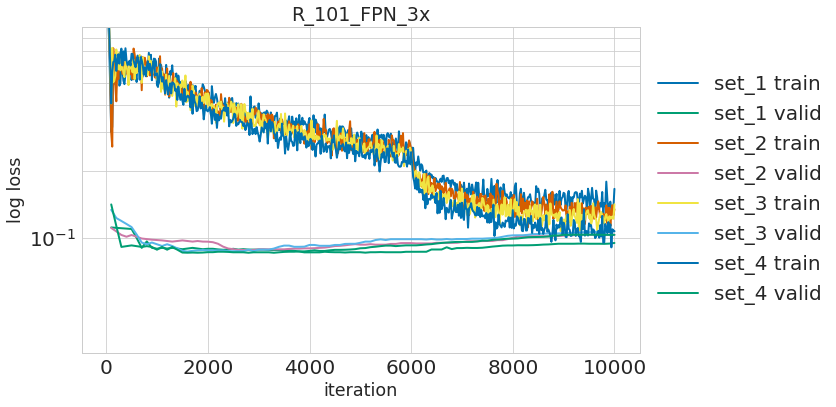

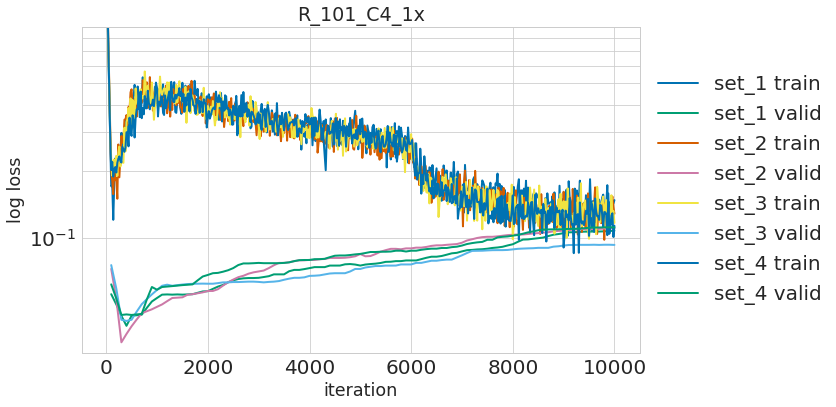

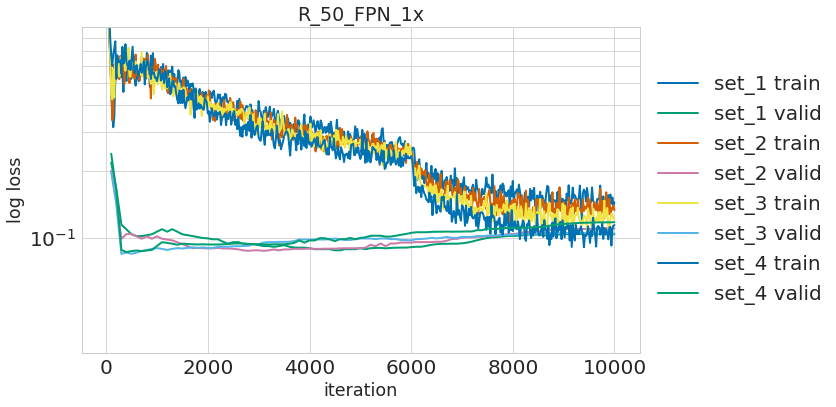

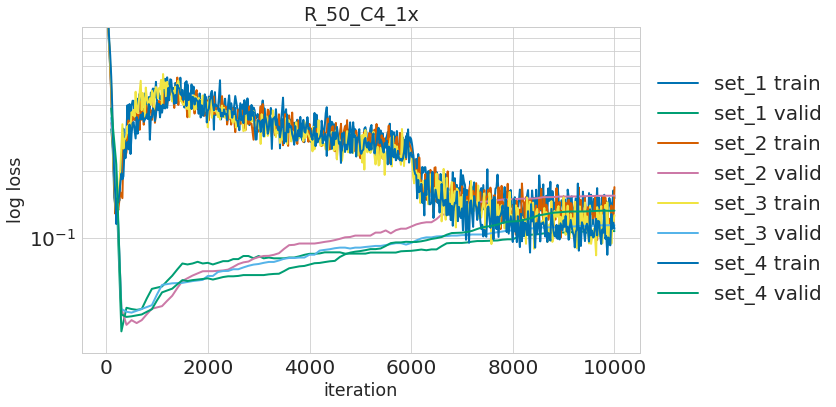

In [128]:
for model in models:    
    
    for d, phase in product(sets, phases):
        df = pd.read_csv(os.path.join(data_path, 'loss', f'{phase}', 
                                       f'run-faster_rcnn_{model}_mbg_{d}-tag-{phase}_loss.csv'))
        
        plt.plot(df['Step'], df['Value'])
        
        
    plt.title(f'{model}')
    plt.legend([f'{d} {phase}' for d, phase in product(sets, aaa)], 
               loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('iteration')
    plt.ylabel('log loss')
    plt.yscale('log')
    plt.yticks(np.arange(0.1, 1, step=0.1))
    plt.ylim([0.03, 0.9])
    plt.show()    

printing AP50

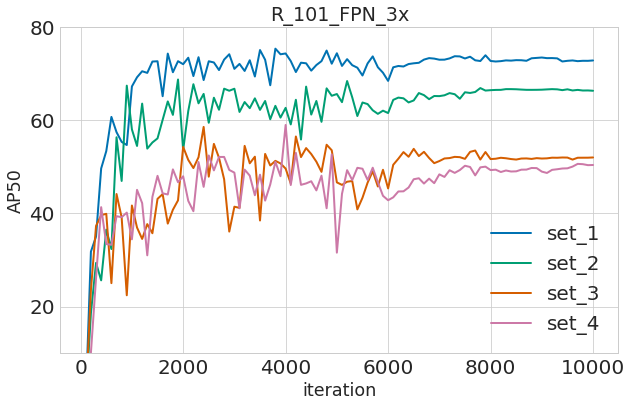

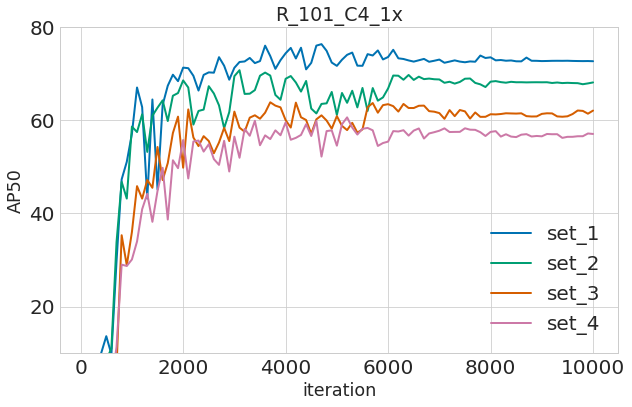

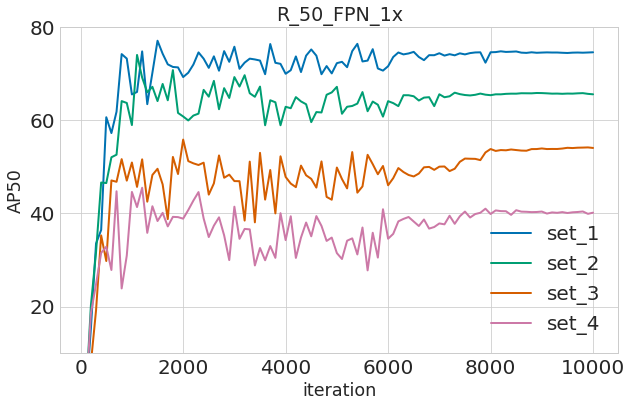

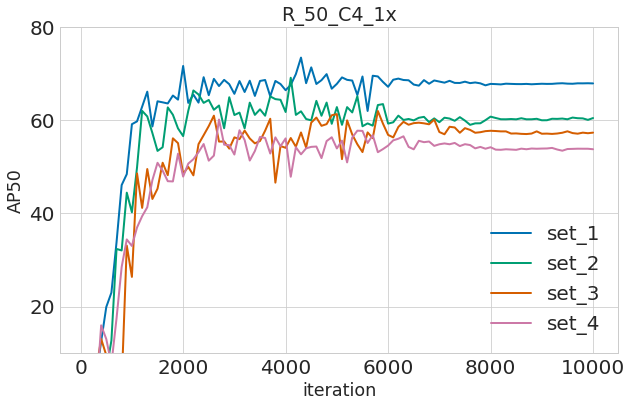

In [108]:
for model in models:    
    
    for d in sets:
        df = pd.read_csv(os.path.join(data_path, 'AP50', 
                                       f'run-faster_rcnn_{model}_mbg_{d}-tag-bbox_AP50.csv'))
        
        plt.plot(df['Step'], df['Value'])
        
        
    plt.title(f'{model}')
    plt.legend([d for d in sets])
    plt.xlabel('iteration')
    plt.ylabel('AP50')
    plt.yticks(np.arange(0, 100, step=20)) 
    plt.ylim([10, 80])
    plt.show()  